<a href="https://colab.research.google.com/github/tania-martynenko/Car_Accident_Analysis/blob/main/Project_Part_I_Data%2BVisualizatiov-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

In [4]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 67.4 MB/s eta 0:00:00


In [5]:
!pip install haversine

In [6]:
#Geographical moduls

from geopy.distance import geodesic
import geopandas as gpd

import contextily as ctx

from haversine import haversine, Unit
import missingno as mn
from shapely.geometry import Point
import seaborn as sns
from wordcloud import WordCloud


In [7]:
import os
import requests
import time

In [11]:
dt_report = pd.read_csv ("/content/drive/MyDrive/KaggleX_Project/Data/Crash_Reporting_-_Drivers_Data.csv")

In [12]:
dt_report.shape

(166537, 43)

Dataset has 166 537 rows and 43 columns.

In [13]:
pd.set_option('display.max_columns', None) #Show all columns

In [14]:
dt_report.head(2)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"


In [15]:
dt_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166537 entries, 0 to 166536
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   166537 non-null  object 
 1   Local Case Number               166537 non-null  object 
 2   Agency Name                     166537 non-null  object 
 3   ACRS Report Type                166537 non-null  object 
 4   Crash Date/Time                 166537 non-null  object 
 5   Route Type                      150113 non-null  object 
 6   Road Name                       151081 non-null  object 
 7   Cross-Street Type               150082 non-null  object 
 8   Cross-Street Name               151070 non-null  object 
 9   Off-Road Description            15454 non-null   object 
 10  Municipality                    18458 non-null   object 
 11  Related Non-Motorist            5277 non-null    object 
 12  Collision Type  

Dataset has different data type, as float64 - 2 columns, int64 - 2 columns, object - 39 columns.

Checking dublicates and missing value:

In [16]:
#copy original dataset before procced modificatio
df = dt_report.copy()

In [17]:
df.shape

(166537, 43)

In [18]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

Dataset has 0 dublicates values.

<Axes: >

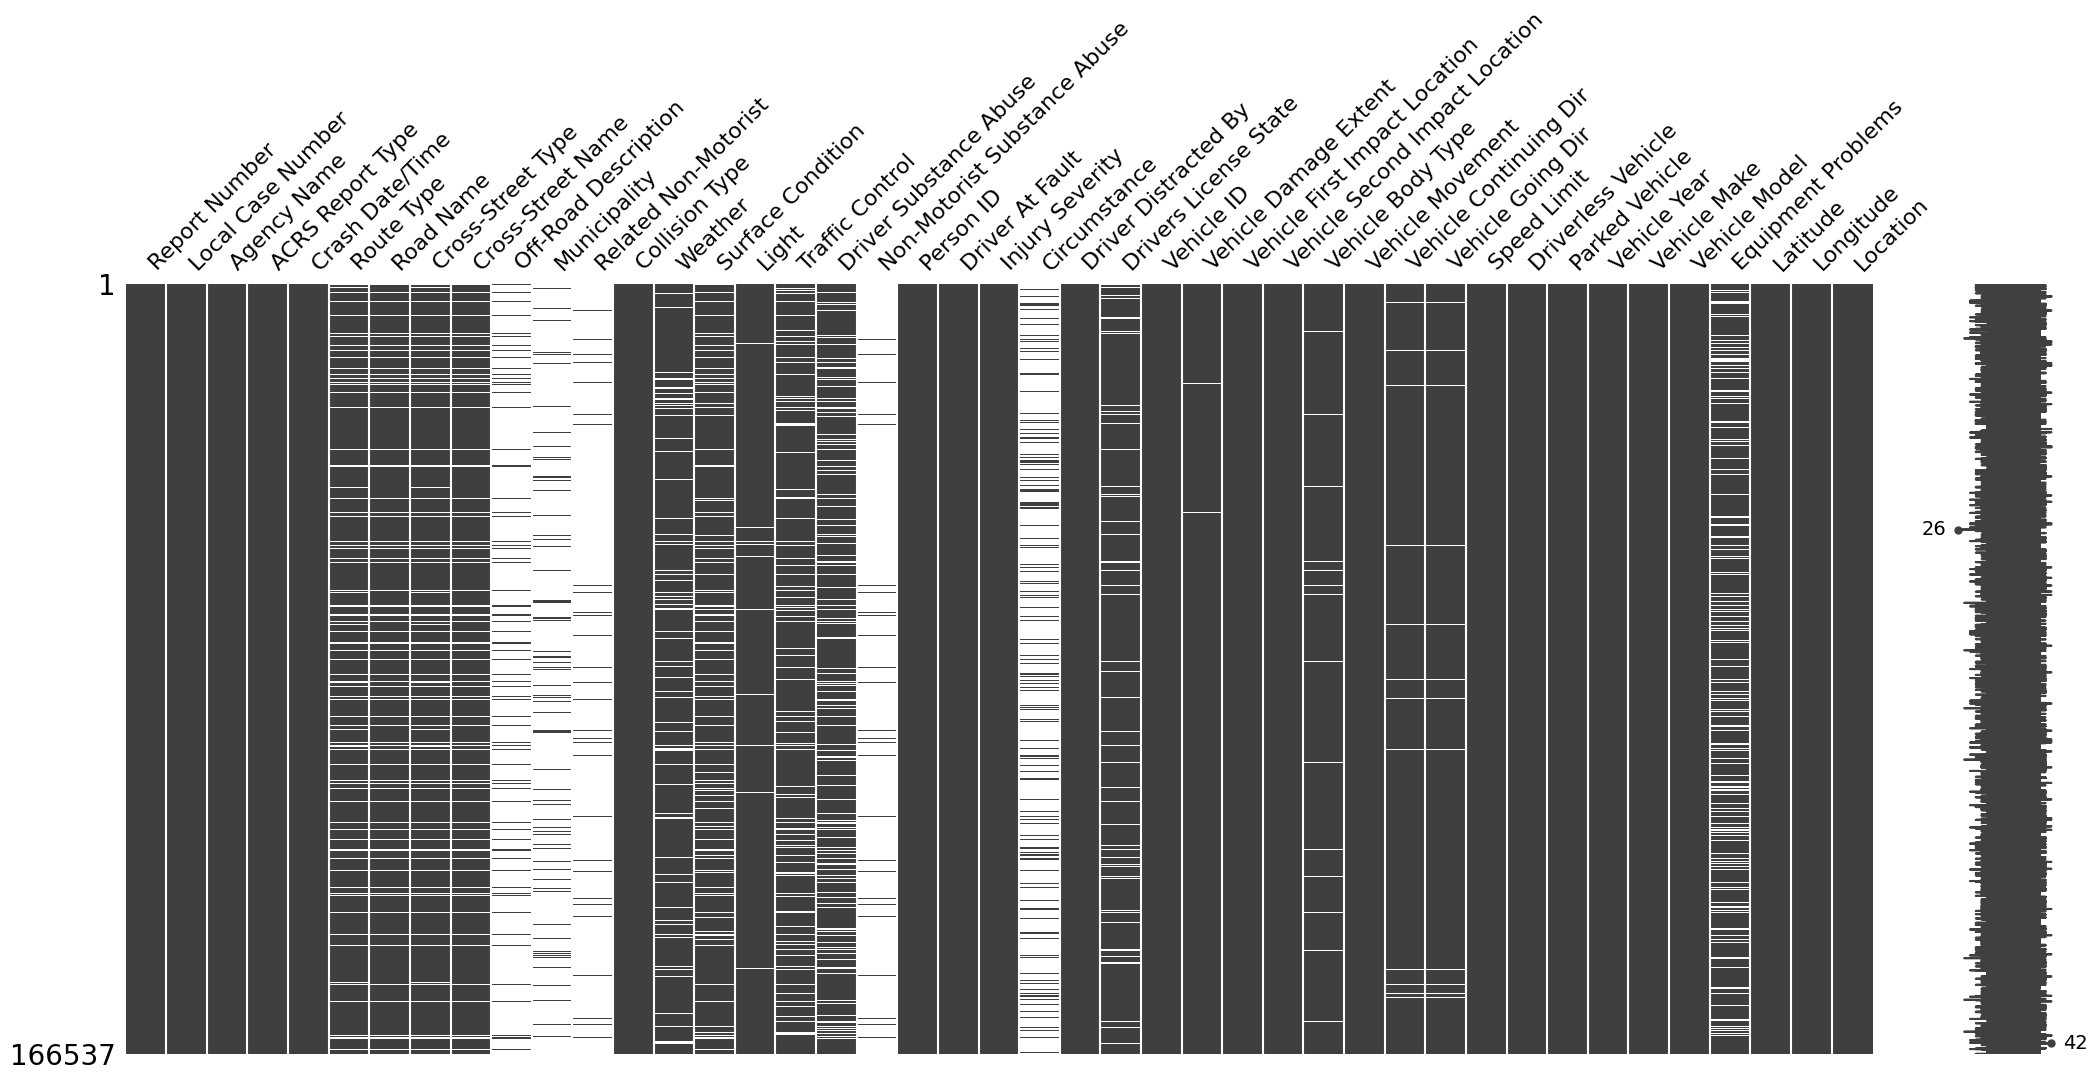

In [19]:
#Checking Missing Values Pattern in Dataframe
import missingno as mn
mn.matrix(df)

In [20]:
# Let's check for missing values in the data in %
print("Missing Value                      %: ")
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Missing Value                      %: 


Report Number                      0.00
Local Case Number                  0.00
Agency Name                        0.00
ACRS Report Type                   0.00
Crash Date/Time                    0.00
Route Type                         9.86
Road Name                          9.28
Cross-Street Type                  9.88
Cross-Street Name                  9.29
Off-Road Description              90.72
Municipality                      88.92
Related Non-Motorist              96.83
Collision Type                     0.34
Weather                            7.77
Surface Condition                 11.72
Light                              0.83
Traffic Control                   14.88
Driver Substance Abuse            18.22
Non-Motorist Substance Abuse      97.50
Person ID                          0.00
Driver At Fault                    0.00
Injury Severity                    0.00
Circumstance                      81.77
Driver Distracted By               0.00
Drivers License State              5.71


In [ ]:
#Drop rows where is related to NON-Motorist accident
#df.dropna(subset=['Related Non-Motorist'], inplace=True)


In [21]:
df.groupby('Related Non-Motorist').size()

Related Non-Motorist
BICYCLIST                       1134
BICYCLIST, OTHER                   4
BICYCLIST, PEDESTRIAN              3
IN ANIMAL-DRAWN VEH                1
MACHINE OPERATOR/RIDER            35
OTHER                            236
OTHER CONVEYANCE                  83
OTHER CONVEYANCE, PEDESTRIAN       1
OTHER PEDALCYCLIST                23
OTHER, OTHER CONVEYANCE            1
OTHER, PEDESTRIAN                  8
PEDESTRIAN                      3748
dtype: int64

In [22]:
df = df[df['Related Non-Motorist'].isnull()] #drop rows related to non-motorist accedent

In [23]:
df.drop('Related Non-Motorist', axis=1, inplace=True)

In [24]:
df.drop('Non-Motorist Substance Abuse', axis=1, inplace=True)

### Drop columns with missing value 75%

In [25]:
# Persentage of Missing Value:

missing_values = df.isna().sum().sort_values(ascending=False)

missing_percentage = missing_values[missing_values!=0]/len(df)*100
#Dropping Columns with missing value gretter that 75%
columns_to_drop = missing_percentage[missing_percentage >= 75].index
print("Dropping columns with missing value gretter than 75% :", columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

#print("Percentage of Missing Values \n", missing_percentage)

Dropping columns with missing value gretter than 75% : Index(['Off-Road Description', 'Municipality', 'Circumstance'], dtype='object')


In [26]:
# Let's check for missing values in the data in %
print("Missing Value                      %: ")
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Missing Value                      %: 


Report Number                      0.00
Local Case Number                  0.00
Agency Name                        0.00
ACRS Report Type                   0.00
Crash Date/Time                    0.00
Route Type                         9.45
Road Name                          8.89
Cross-Street Type                  9.47
Cross-Street Name                  8.90
Collision Type                     0.25
Weather                            7.75
Surface Condition                 11.33
Light                              0.83
Traffic Control                   14.90
Driver Substance Abuse            18.23
Person ID                          0.00
Driver At Fault                    0.00
Injury Severity                    0.00
Driver Distracted By               0.00
Drivers License State              5.54
Vehicle ID                         0.00
Vehicle Damage Extent              0.16
Vehicle First Impact Location      0.09
Vehicle Second Impact Location     0.15
Vehicle Body Type                  1.37


Observation:
Let's address the columns with the highest missing data percentages:
- Equipment Problems: 20.02% missing
- Driver Substance Abuse: 18.23% missing
- Traffic Control: 14.90% missing
- Surface Condition: 11.33% missing
- Route Type, Road Name, Cross-Street Type, Cross-Street Name: Approximately 9% missing

Let's handle these missing values for futher analysis.

 Categorical Columns
categorical_columns = [
    'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name',
    'Collision Type', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse', 'Drivers License State',
    'Vehicle Damage Extent', 'Vehicle First Impact Location',
    'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement',
    'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Make',
    'Vehicle Model', 'Equipment Problems']

for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

### Modifying data format

In [28]:
df.head(2)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"


In [29]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

In [30]:
df['Weekday?'] = df['Crash Date/Time'].dt.day_name().apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

In [31]:
df['Crash Time'] = df['Crash Date/Time'].dt.time

In [32]:
df['Crash Date'] = df['Crash Date/Time'].dt.date

In [33]:
df.head(2)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Weekday?,Crash Time,Crash Date
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,2019-05-31 15:00:00,NaN,NaN,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",weekday,15:00:00,2019-05-31
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,2019-05-24 17:00:00,NaN,NaN,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)",weekday,17:00:00,2019-05-24


In [34]:
df.drop('Crash Date/Time', axis=1, inplace=True)

In [36]:
df.groupby('Collision Type').size() #Collision Type has 0.25 % Missing Value

Collision Type
ANGLE MEETS LEFT HEAD ON          683
ANGLE MEETS LEFT TURN            1932
ANGLE MEETS RIGHT TURN           1154
HEAD ON                          3592
HEAD ON LEFT TURN               12373
OPPOSITE DIR BOTH LEFT TURN       306
OPPOSITE DIRECTION SIDESWIPE     2770
OTHER                           16157
SAME DIR BOTH LEFT TURN           690
SAME DIR REAR END               53937
SAME DIR REND LEFT TURN           711
SAME DIR REND RIGHT TURN          708
SAME DIRECTION LEFT TURN         3563
SAME DIRECTION RIGHT TURN        3654
SAME DIRECTION SIDESWIPE        15562
SINGLE VEHICLE                  13746
STRAIGHT MOVEMENT ANGLE         28632
UNKNOWN                           689
dtype: int64

In [37]:
df['Collision Type'].isnull().sum()

401

In [38]:
df['Collision Type'].fillna('UNKNOWN', inplace=True)

In [39]:
df.groupby('Injury Severity').size() #Has 0 missing value

Injury Severity
FATAL INJURY                   150
NO APPARENT INJURY          131459
POSSIBLE INJURY              16818
SUSPECTED MINOR INJURY       11471
SUSPECTED SERIOUS INJURY      1362
dtype: int64

In [40]:
df.groupby('Driver Distracted By').size()

Driver Distracted By
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                 127
BY MOVING OBJECT IN VEHICLE                             202
BY OTHER OCCUPANTS                                      388
DIALING CELLULAR PHONE                                   44
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT            892
EATING OR DRINKING                                      192
INATTENTIVE OR LOST IN THOUGHT                         4070
LOOKED BUT DID NOT SEE                                19150
NO DRIVER PRESENT                                       256
NOT DISTRACTED                                       101395
OTHER CELLULAR PHONE RELATED                            351
OTHER DISTRACTION                                      3044
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)       316
SMOKING RELATED                                          25
TALKING OR LISTENING TO CELLULAR PHONE                  260
TEXTING FROM A CELLULAR PHONE                            64
UNKNOWN            

In [41]:
def regroup_distracted_by(value):
    phone_related = ["DIALING CELLULAR PHONE", "OTHER CELLULAR PHONE RELATED",
                     "TALKING OR LISTENING TO CELLULAR PHONE", "TEXTING FROM A CELLULAR PHONE"]

    in_vehicle_distractions = ["ADJUSTING AUDIO AND OR CLIMATE CONTROLS", "BY MOVING OBJECT IN VEHICLE",
                               "BY OTHER OCCUPANTS", "EATING OR DRINKING", "OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)",
                               "SMOKING RELATED", "USING DEVICE OBJECT BROUGHT INTO VEHICLE",
                               "USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE"]

    external_distractions = ["DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT", "LOOKED BUT DID NOT SEE"]

    mental_distractions = ["INATTENTIVE OR LOST IN THOUGHT"]

    if value in phone_related:
        return "Phone Distractions"
    elif value in in_vehicle_distractions:
        return "In-vehicle Distractions"
    elif value in external_distractions:
        return "External Distractions"
    elif value in mental_distractions:
        return "Mental Distractions"
    elif value == "NOT DISTRACTED":
        return "NOT DISTRACTED"
    elif value == "NO DRIVER PRESENT":
        return "NO DRIVER PRESENT"
    else:
        return "Others"

df['Driver Distracted Group'] = df['Driver Distracted By'].apply(regroup_distracted_by)


In [43]:
df.groupby('Driver Distracted By').size() # Route Type has 9.45% Missing Value

Route Type
County                  51851
Government                578
Interstate (State)       3055
Maryland (State)        73082
Municipality             8644
Other Public Roadway     1049
Ramp                      545
Service Road               39
US (State)               7153
Unknown                    20
dtype: int64

In [44]:
 df.groupby('Driver Substance Abuse').size()

Driver Substance Abuse
ALCOHOL CONTRIBUTED             1384
ALCOHOL PRESENT                 3925
COMBINATION CONTRIBUTED           45
COMBINED SUBSTANCE PRESENT        87
ILLEGAL DRUG CONTRIBUTED          96
ILLEGAL DRUG PRESENT             249
MEDICATION CONTRIBUTED            62
MEDICATION PRESENT               112
NONE DETECTED                 114957
OTHER                             57
UNKNOWN                        10889
dtype: int64

In [45]:
def regroup_substance_abuse(value):
    alcohol_related = ["ALCOHOL CONTRIBUTED", "ALCOHOL PRESENT"]

    illigal_drug_related = ["ILLEGAL DRUG CONTRIBUTED", "ILLEGAL DRUG PRESENT"]

    medical_drugs  =  ["MEDICATION CONTRIBUTED", "MEDICATION PRESENT"]

    combined_substance = ["COMBINATION CONTRIBUTED", "COMBINED SUBSTANCE PRESENT"]

    if value in alcohol_related:
        return "Alcohol"
    elif value in illigal_drug_related:
        return "Drugs"
    elif value in medical_drugs:
        return "Medication"
    elif value in combined_substance:
        return "Combined Substance"
    elif value == "NONE DETECTED":
        return "None Detected"
    elif value == "OTHER":
        return "Other"
    elif value == "UNKNOWN":
      return "Unknown"
df['Driver Substance Abuse'] = df['Driver Substance Abuse'].apply(regroup_substance_abuse)


In [46]:
df.groupby('Driver Substance Abuse').size()

Driver Substance Abuse
Alcohol                 5309
Combined Substance       132
Drugs                    345
Medication               174
None Detected         114957
Other                     57
Unknown                10889
dtype: int64

In [47]:
df['Driver Substance Abuse'].isnull().sum()

29397

In [48]:
df['Driver Substance Abuse'].fillna('Unknown', inplace=True)

In [49]:
df.groupby('Equipment Problems').size()

Equipment Problems
AIR BAG FAILED            164
BELT(S) MISUSED            31
BELTS/ANCHORS BROKE        11
FACING WRONG WAY            5
NO MISUSE              115743
NOT STREPPED RIGHT          3
OTHER                     108
SIZE/TYPE IMPROPER          2
STRAP/TETHER LOOSE          8
UNKNOWN                 12905
dtype: int64

In [50]:
df['Equipment Problems'].isnull().sum()

32280

In [51]:
df['Equipment Problems'].fillna('UNKNOWN', inplace=True)

In [52]:
df.groupby('Driver At Fault').size()

Driver At Fault
No         71101
Unknown     4088
Yes        86071
dtype: int64

In [53]:
df['Driver At Fault'].isnull().sum()

0

In [54]:
df.groupby('Agency Name').size()


Agency Name
GAITHERSBURG                    383
Gaithersburg Police Depar      7202
MCPARK                           76
MONTGOMERY                    10304
Maryland-National Capital      1074
Montgomery County Police     129547
ROCKVILLE                       611
Rockville Police Departme      9149
TAKOMA                          154
Takoma Park Police Depart      2760
dtype: int64

In [55]:
df['Agency Name'].isnull().sum()

0

In [58]:
df.groupby('Route Type').size()

Route Type
County                  51851
Government                578
Interstate (State)       3055
Maryland (State)        73082
Municipality             8644
Other Public Roadway     1049
Ramp                      545
Service Road               39
US (State)               7153
Unknown                    20
dtype: int64

In [59]:
df['Route Type'].isnull().sum()

15244

In [60]:
df['Route Type'].fillna('Unknown', inplace=True)

In [61]:
df.groupby('Road Name').size()

Road Name
100 BLK PHILADELPHIA                  2
1030 VIERS MILL ROAD                  2
10719 VENETIA MILL CIRCLE             1
10TH AVE                              3
11160 VEIRS MILL RD (PARKING LOT)     2
                                     ..
YORK LA                               1
YORKTOWN RD                           2
YOSEMITE DR                           1
ZETTS AVE                             2
ZION RD                              31
Length: 3608, dtype: int64

In [62]:
df['Road Name'].isnull().sum()

14344

In [63]:
df['Road Name'].fillna('Unknown', inplace=True)

In [64]:
df.groupby('Cross-Street Type').size()

Cross-Street Type
County                  80483
Government               1082
Interstate (State)        650
Maryland (State)        22902
Municipality            17912
Other Public Roadway     3562
Ramp                     5690
Service Road               90
US (State)               1377
Unknown                 12238
dtype: int64

In [65]:
df['Cross-Street Type'].isnull().sum()

15274

In [66]:
df['Cross-Street Type'].fillna('Unknown', inplace=True)

In [67]:
df.groupby('Cross-Street Name').size()

Cross-Street Name
10TH AVE                              5
11TH AVE                             61
13TH ST                              45
13TH STREET                           2
16201 NEW HAMPSHIRE AVE               2
                                   ... 
ZEBRAWOOD CT                          8
ZETTS AVE                            21
ZINIA CIR                             1
ZION EVANGELICAL LUTHERAN CHURCH      2
ZION RD                             111
Length: 6447, dtype: int64

In [68]:
df['Cross-Street Name'].isnull().sum()

14354

In [69]:
df['Cross-Street Name'].fillna('Unknown', inplace=True)

In [70]:
df.groupby('Weather').size()

Weather
BLOWING SAND, SOIL, DIRT        15
BLOWING SNOW                   112
CLEAR                       109224
CLOUDY                       16298
FOGGY                          620
OTHER                          347
RAINING                      19368
SEVERE WINDS                   147
SLEET                          210
SNOW                          1403
UNKNOWN                        636
WINTRY MIX                     375
dtype: int64

In [76]:
df['Weather'].isnull().sum()

12505

In [77]:
df['Weather'].fillna('UNKNOWN', inplace=True)

In [72]:
df.groupby('Surface Condition').size()

Surface Condition
DRY                       113248
ICE                         1022
MUD, DIRT, GRAVEL             46
OIL                           28
OTHER                        157
SAND                           4
SLUSH                        197
SNOW                         921
UNKNOWN                      469
WATER(STANDING/MOVING)        39
WET                        26864
dtype: int64

In [73]:
df['Surface Condition'].isnull().sum()

18265

In [74]:
df['Surface Condition'].fillna('UNKNOWN', inplace=True)

In [79]:
 df.groupby('Light').size()

Light
DARK -- UNKNOWN LIGHTING      1446
DARK LIGHTS ON               36455
DARK NO LIGHTS                4539
DAWN                          3189
DAYLIGHT                    109650
DUSK                          3675
OTHER                          326
UNKNOWN                        643
dtype: int64

In [80]:
df['Light'].isnull().sum()

1337

In [81]:
df['Light'].fillna('UNKNOWN', inplace=True)

In [84]:
df.groupby('Traffic Control').size()

Traffic Control
FLASHING TRAFFIC SIGNAL     2041
NO CONTROLS                64169
OTHER                       1776
PERSON                       215
RAILWAY CROSSING DEVICE       40
SCHOOL ZONE SIGN DEVICE       12
STOP SIGN                  11518
TRAFFIC SIGNAL             55410
UNKNOWN                      253
WARNING SIGN                 138
YIELD SIGN                  1660
dtype: int64

In [87]:
df['Traffic Control'].isnull().sum()

24028

In [88]:
df['Traffic Control'].fillna('UNKNOWN', inplace=True)

In [90]:
df.groupby('Speed Limit').size()

Speed Limit
0      4339
5      3731
10     2769
15     5468
20     1051
25    21924
30    21888
35    47517
40    32200
45    11938
50     4478
55     3823
60       71
65       57
70        6
dtype: int64

In [91]:
df.groupby('Vehicle Movement').size()


Vehicle Movement
ACCELERATING                8894
BACKING                     5309
CHANGING LANES              4481
DRIVERLESS MOVING VEH.        35
ENTERING TRAFFIC LANE        755
LEAVING TRAFFIC LANE         200
MAKING LEFT TURN           15119
MAKING RIGHT TURN           4572
MAKING U TURN               1161
MOVING CONSTANT SPEED      63367
NEGOTIATING A CURVE          515
OTHER                        829
PARKED                      2549
PARKING                     1808
PASSING                      877
RIGHT TURN ON RED            195
SKIDDING                     653
SLOWING OR STOPPING        23433
STARTING FROM LANE          4099
STARTING FROM PARKED        1708
STOPPED IN TRAFFIC LANE    17767
UNKNOWN                     2583
dtype: int64

In [92]:
df['Vehicle Movement'].isnull().sum()

351

In [93]:
df['Vehicle Movement'].fillna('UNKNOWN', inplace=True)

In [95]:
df.groupby('Vehicle Damage Extent').size()

Vehicle Damage Extent
DESTROYED       7250
DISABLING      60052
FUNCTIONAL     42821
NO DAMAGE       3948
OTHER             95
SUPERFICIAL    40940
UNKNOWN         5889
dtype: int64

In [96]:
df['Vehicle Damage Extent'].isnull().sum()

265

In [97]:
df['Vehicle Damage Extent'].fillna('UNKNOWN', inplace=True)

In [100]:
# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns

In [101]:
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161260 entries, 0 to 166536
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   161260 non-null  object 
 1   Local Case Number               161260 non-null  object 
 2   Agency Name                     161260 non-null  object 
 3   ACRS Report Type                161260 non-null  object 
 4   Route Type                      161260 non-null  object 
 5   Road Name                       161260 non-null  object 
 6   Cross-Street Type               161260 non-null  object 
 7   Cross-Street Name               161260 non-null  object 
 8   Collision Type                  161260 non-null  object 
 9   Weather                         161260 non-null  object 
 10  Surface Condition               161260 non-null  object 
 11  Light                           161260 non-null  object 
 12  Traffic Control 

A DataFrame has 161,260 entries spread across 41 columns.

Data Types:

Object (string or categorical): 37 columns
Float64 (floating-point numbers): 2 columns
Int64 (integer numbers): 2 columns

### EDA

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161260 entries, 0 to 166536
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   161260 non-null  object 
 1   Local Case Number               161260 non-null  object 
 2   Agency Name                     161260 non-null  object 
 3   ACRS Report Type                161260 non-null  object 
 4   Route Type                      161260 non-null  object 
 5   Road Name                       161260 non-null  object 
 6   Cross-Street Type               161260 non-null  object 
 7   Cross-Street Name               161260 non-null  object 
 8   Collision Type                  161260 non-null  object 
 9   Weather                         161260 non-null  object 
 10  Surface Condition               161260 non-null  object 
 11  Light                           161260 non-null  object 
 12  Traffic Control 

In [114]:
# Convert 'Weekday' column to datetime
#df['Weekday?'] = pd.to_datetime(df['Weekday?'], errors='coerce')

# Convert 'Crash Time' column to datetime
#df['Crash Time'] = pd.to_datetime(df['Crash Time'], errors='coerce')

# Convert 'Crash Date' column to datetime
df['Crash Date'] = pd.to_datetime(df['Crash Date'], errors='coerce')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161260 entries, 0 to 166536
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Report Number                   161260 non-null  object        
 1   Local Case Number               161260 non-null  object        
 2   Agency Name                     161260 non-null  object        
 3   ACRS Report Type                161260 non-null  object        
 4   Route Type                      161260 non-null  object        
 5   Road Name                       161260 non-null  object        
 6   Cross-Street Type               161260 non-null  object        
 7   Cross-Street Name               161260 non-null  object        
 8   Collision Type                  161260 non-null  object        
 9   Weather                         161260 non-null  object        
 10  Surface Condition               161260 non-null  object 

In [118]:
df['Weekday?'] = pd.to_datetime(df['Weekday?'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['Crash Time'] = pd.to_datetime(df['Crash Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [119]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Weekday?,Crash Time,Crash Date,Driver Distracted Group
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,Unknown,Unknown,Unknown,Unknown,OTHER,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,Unknown,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,Unknown,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",NaT,NaT,2019-05-31,Others
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,Unknown,Unknown,Unknown,Unknown,UNKNOWN,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,Unknown,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,UNKNOWN,39.199047,-77.250743,"(39.19904667, -77.25074333)",NaT,NaT,2019-05-24,NOT DISTRACTED
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,County,SELFRIDGE RD,County,RANDOLPH RD,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,Unknown,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,Yes,NO APPARENT INJURY,INATTENTIVE OR LOST IN THOUGHT,MD,8B61B8E0-5473-4C78-A654-6029684ABD03,SUPERFICIAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,East,East,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)",NaT,NaT,2023-07-17,Mental Distractions
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,OTHER,UNKNOWN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,Unknown,E611A3F8-5F7D-465B-8DE0-3814027998F1,No,NO APPARENT INJURY,NOT DISTRACTED,MD,1A592482-AF1F-49CE-8554-77EF7C55966B,SUPERFICIAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,South,East,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)",NaT,NaT,2023-07-20,NOT DISTRACTED
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,SAME DIR REAR END,UNKNOWN,DRY,DAYLIGHT,NO CONTROLS,Unknown,3C7F6951-1701-44DC-9824-88DF4E32352E,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,MD,C2EF337E-5881-48ED-9B06-36D0BE00557C,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,"MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4...",MOVING CONSTANT SPEED,Unknown,Unknown,25,No,No,2001,KENWORTH,TRUCK,UNKNOWN,39.149085,-77.210731,"(39.14908542, -77.21073135)",NaT,NaT,2023-07-13,External Distractions


In [111]:
categorical_cols

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Second Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir',
       'Vehicle Going Dir', 'Driverless Vehicle', 'Parked Vehicle',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Location',
       'Weekday?', 'Crash Time', 'Crash Date', 'Driver Distracted Group'],
      dtype='object')

In [ ]:
categoracil_items = []

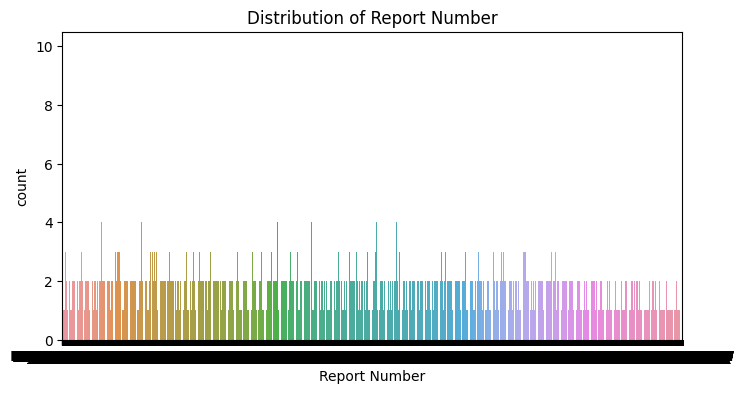

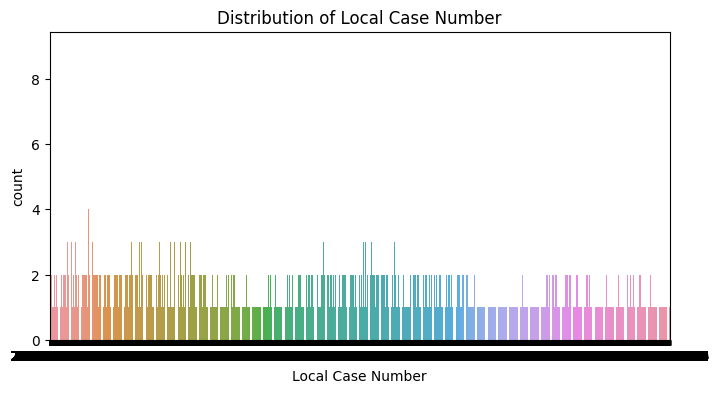

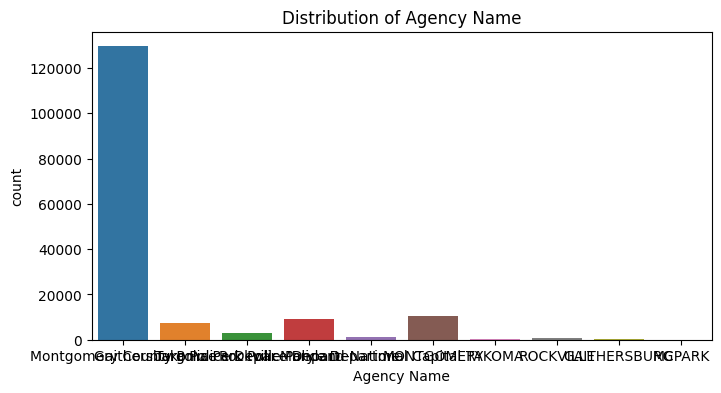

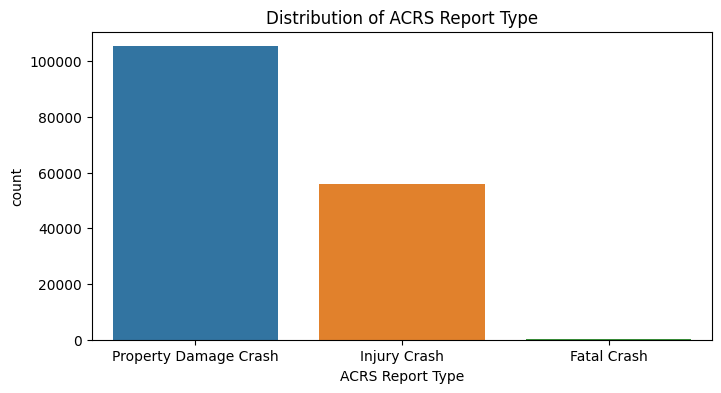

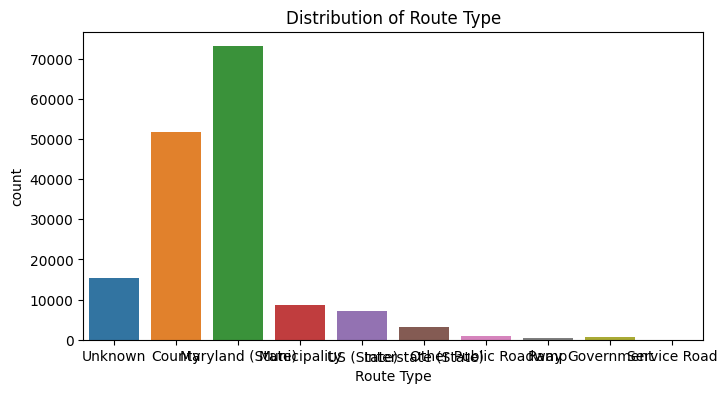

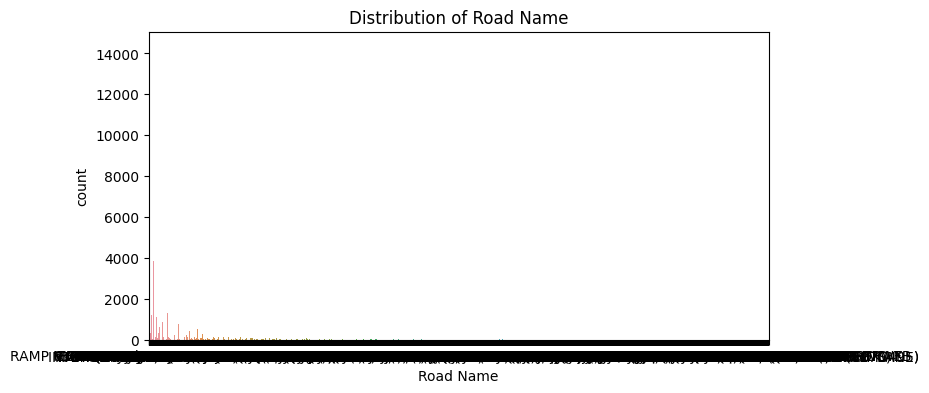

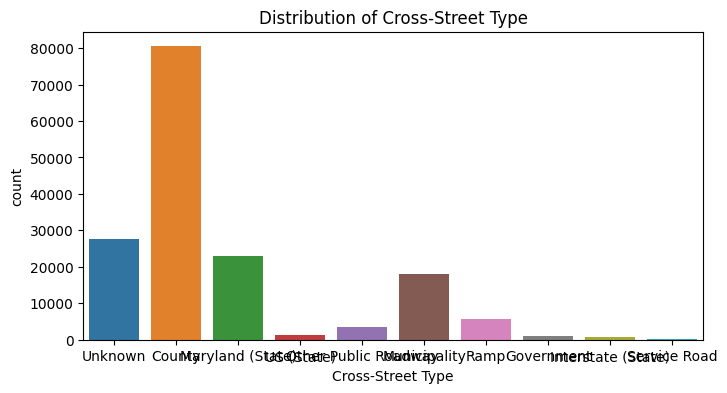

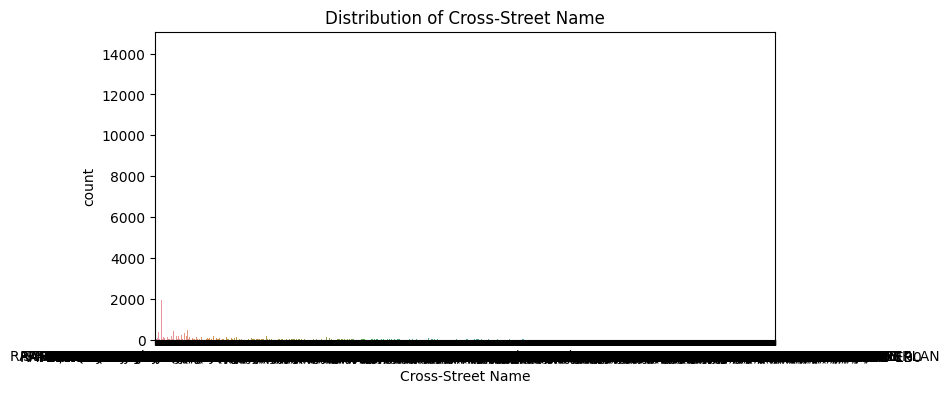

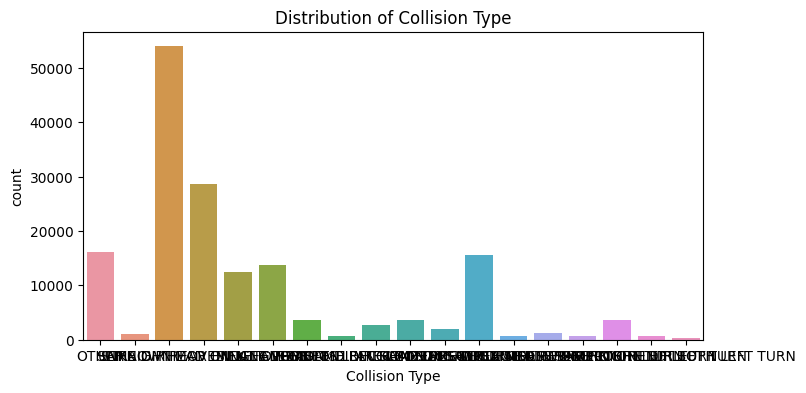

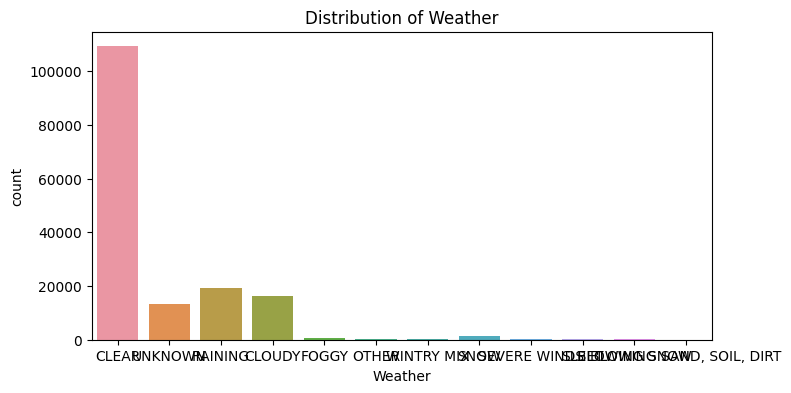

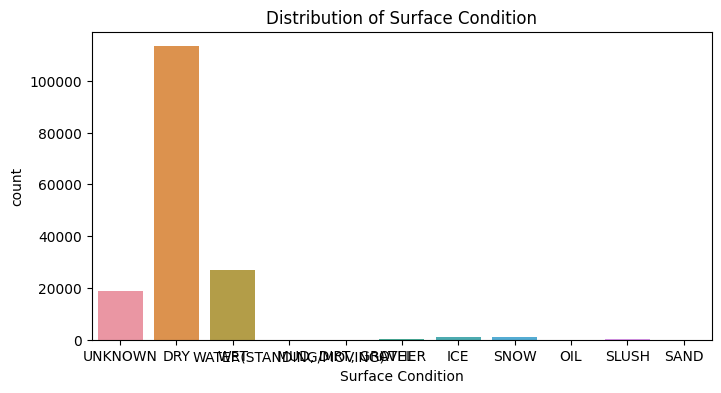

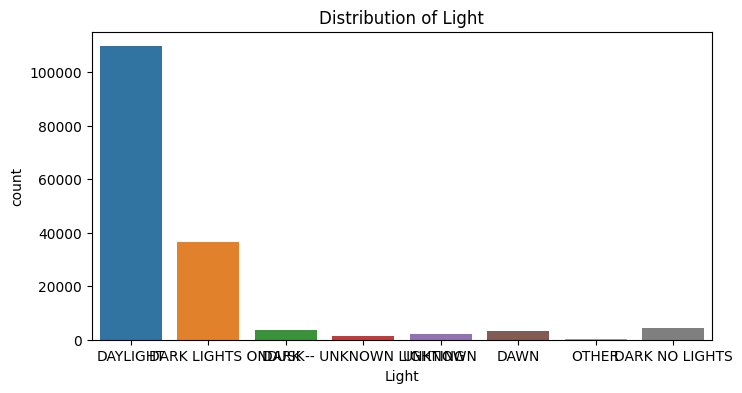

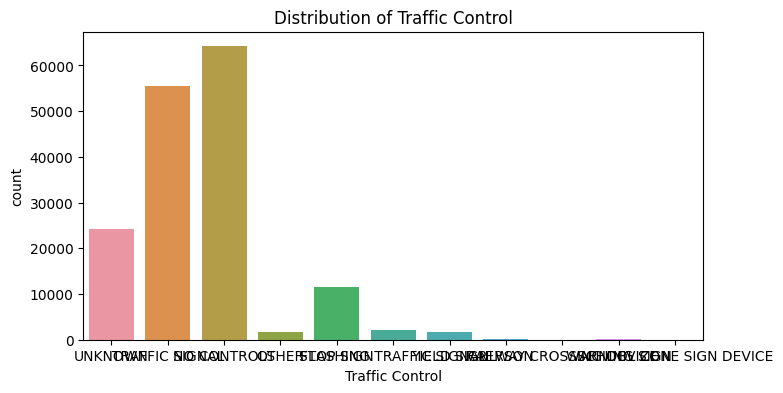

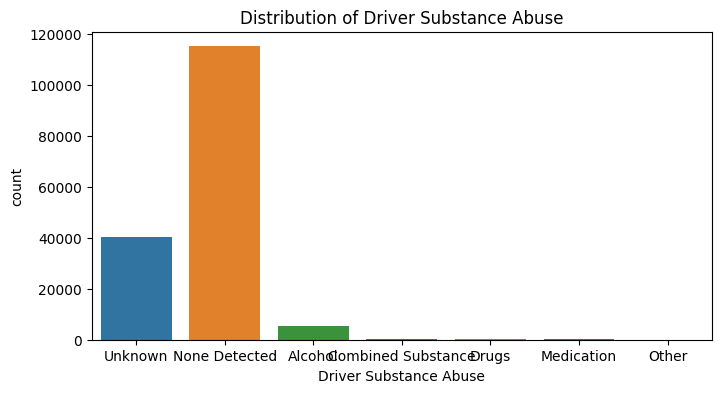

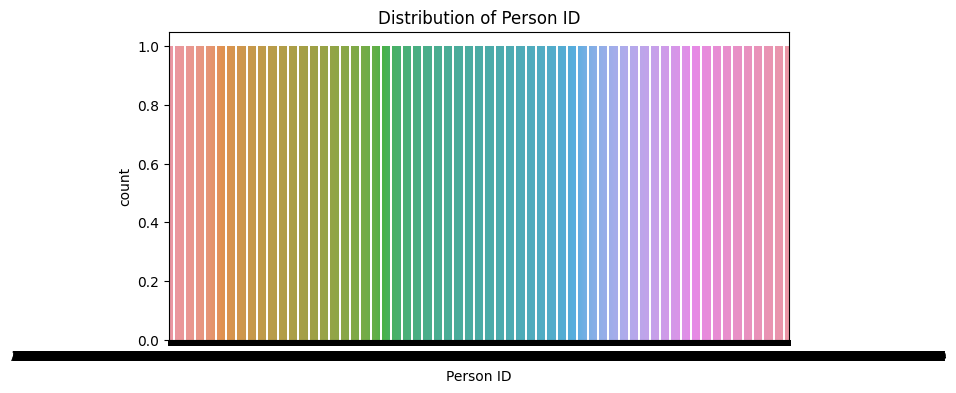

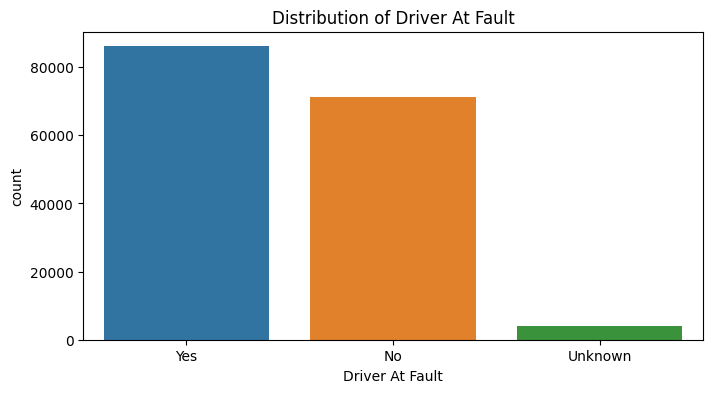

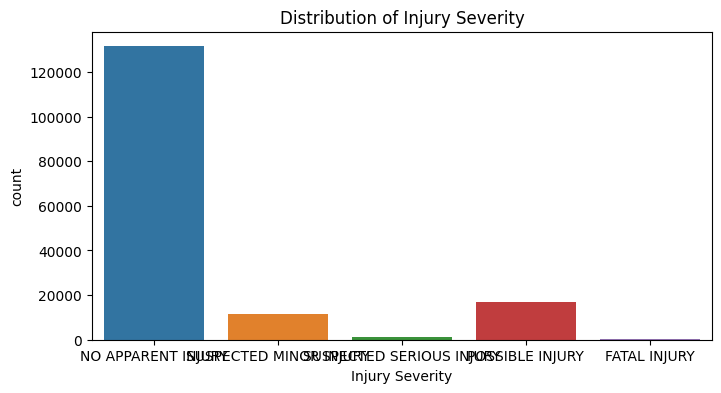

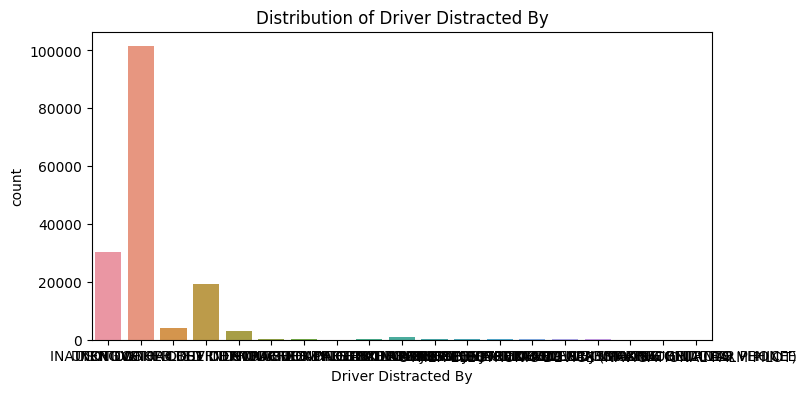

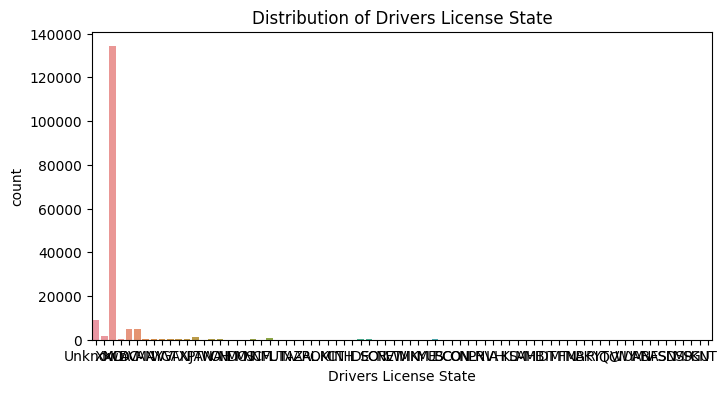

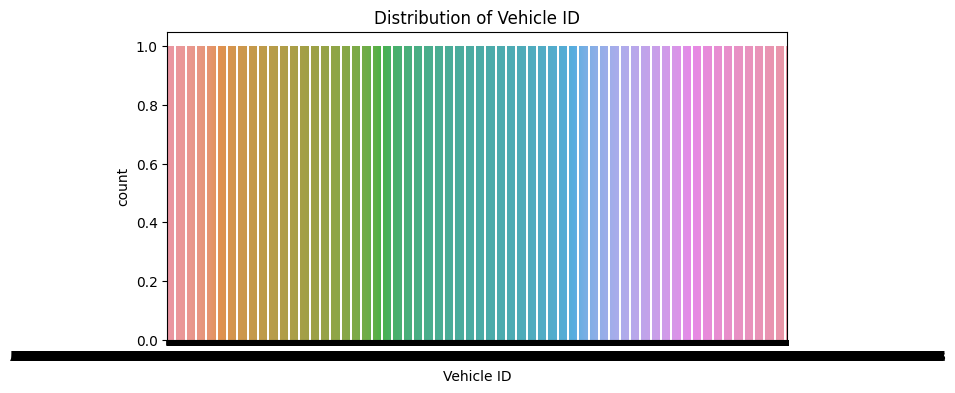

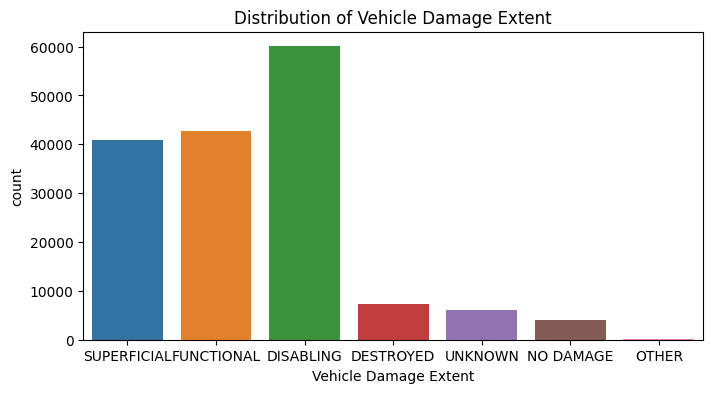

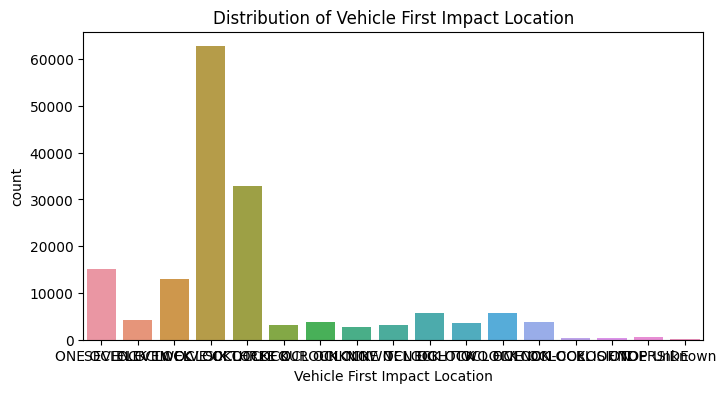

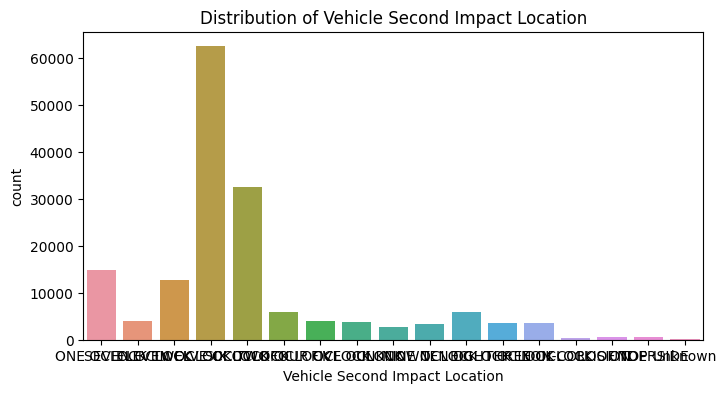

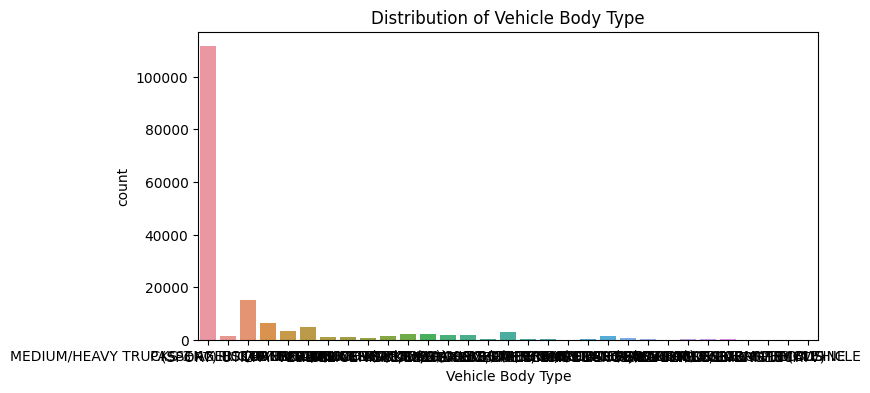

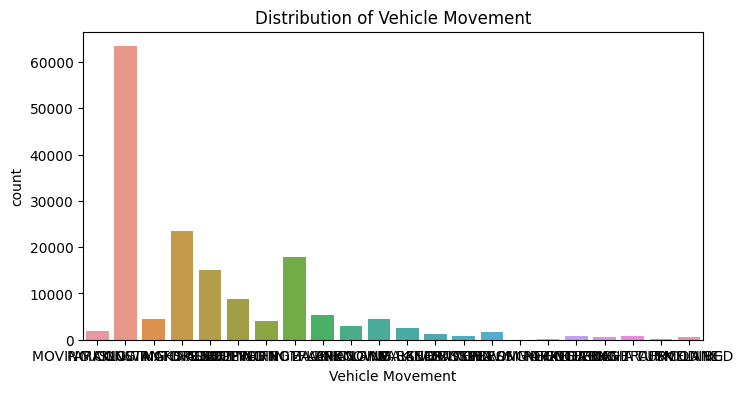

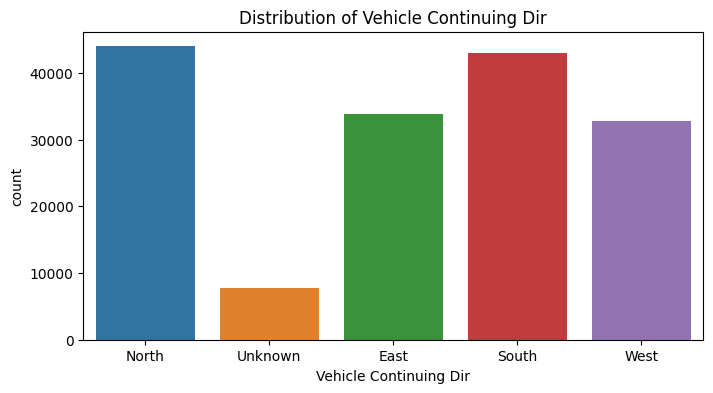

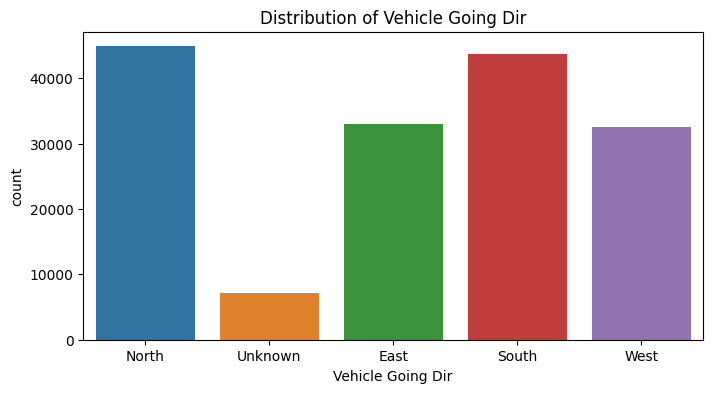

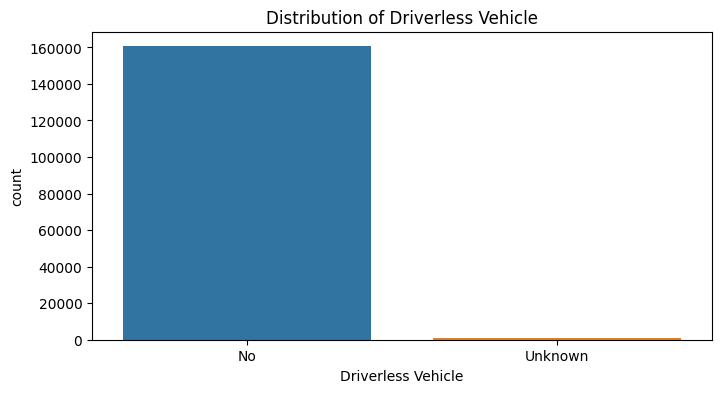

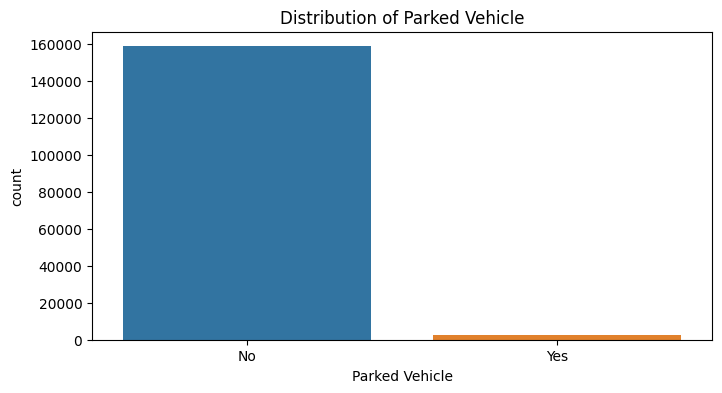

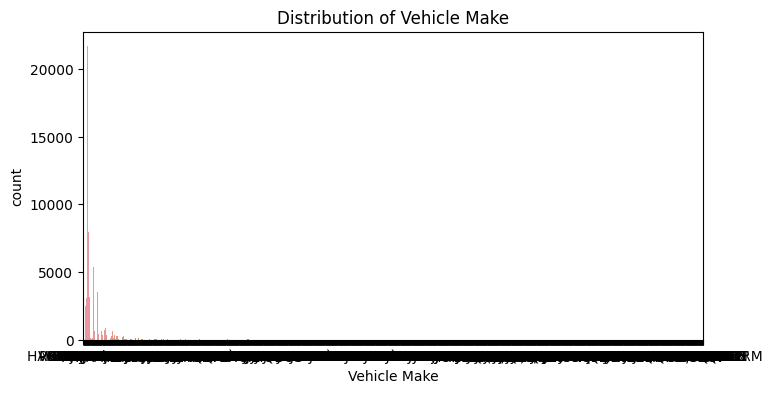

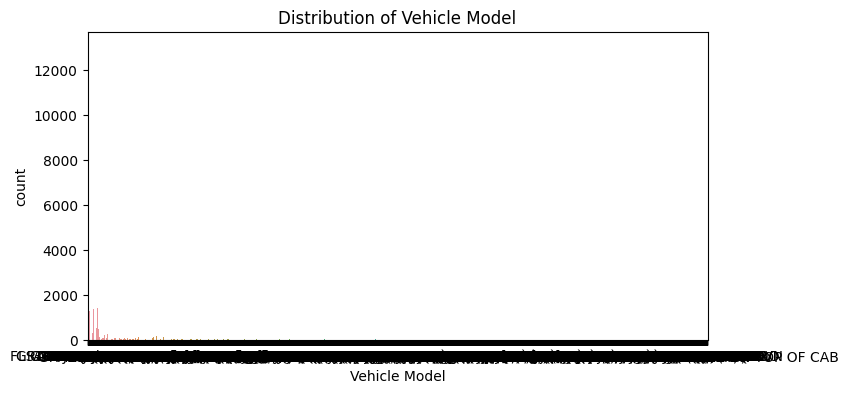

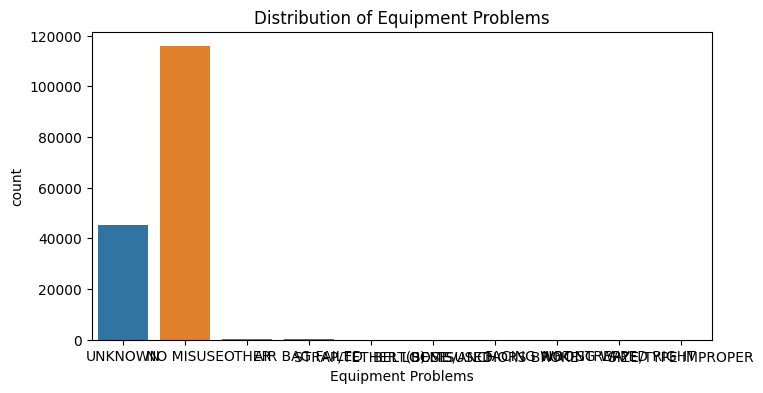

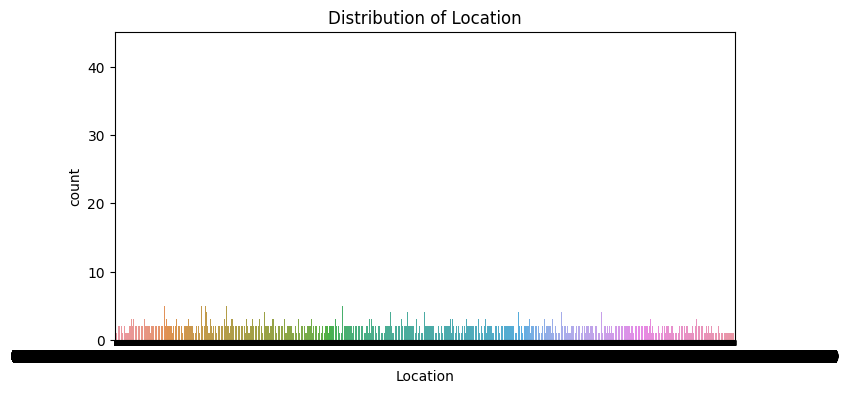

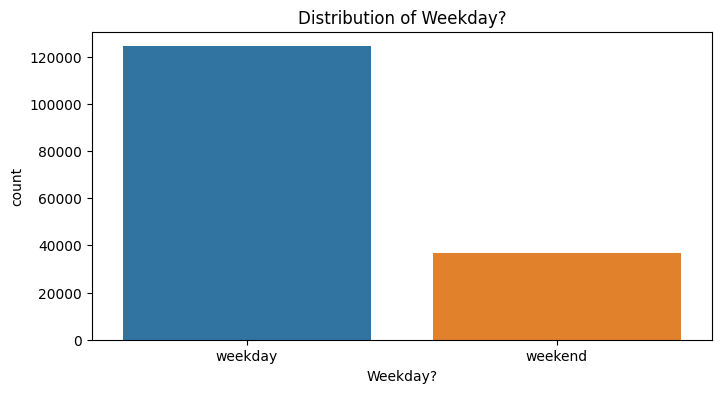

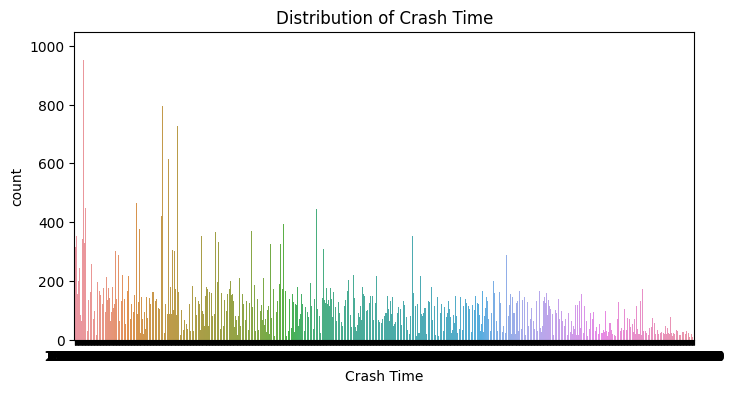

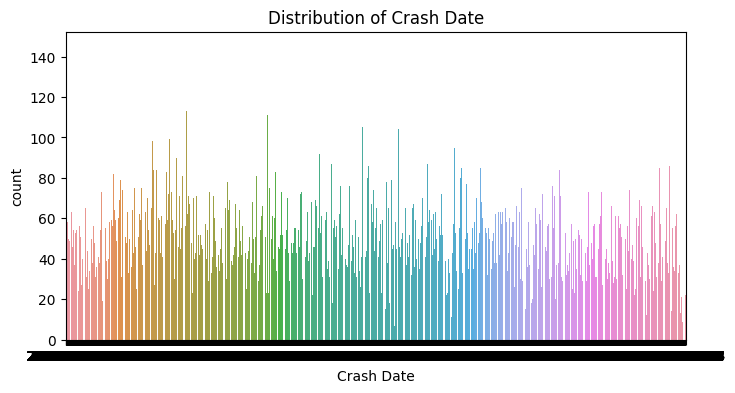

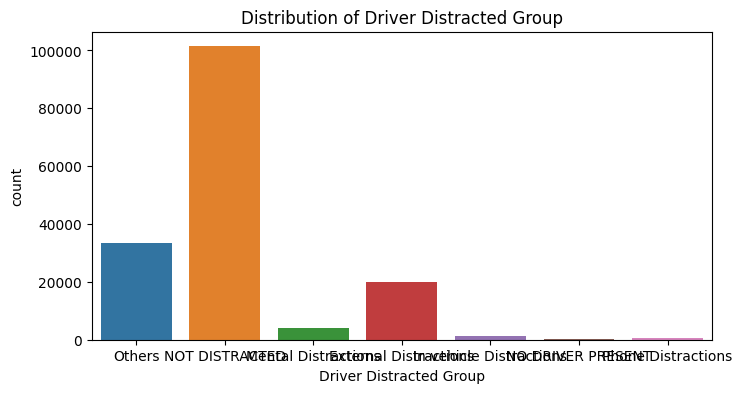

In [110]:
for feature in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    plt.show()

### Geographical data